# Assignment 1

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Classification using KNN

Let's set up our workspace and use the **Wine dataset** from `scikit-learn`. This dataset contains 178 wine samples with 13 chemical features, used to classify wines into different classes based on their origin.

The **response variable** is `class`, which indicates the type of wine. We'll use all of the chemical features to predict this response variable.

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.datasets import load_wine

# Load the Wine dataset
wine_data = load_wine()

# Convert to DataFrame
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Bind the 'class' (wine target) to the DataFrame
wine_df['class'] = wine_data.target

# Display the DataFrame
wine_df


['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
178


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
help(load_wine)

In [6]:
# Your answer here
rows_wine_df = len(wine_df)
rows_wine_df

178

_(ii)_ How many variables (columns) does the dataset contain?

In [ ]:
# Your answer here
#wine_df.info()
columns_wine_df = len(wine_df.columns)
columns_wine_df

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

_(iii)_ What is the 'variable type' of the response variable `class` (e.g., 'integer', 'category', etc.)? What are the 'levels' (unique values) of the variable?

In [28]:
# Your answer here
wine_df['class'].dtype

dtype('int64')


_(iv)_ How many predictor variables do we have (Hint: all variables other than `class`)? 

In [ ]:
# Your answer here
columns_to_exclude = ['class']
predictor_variable = wine_df.columns.difference(columns_to_exclude)
predictor_variable


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


You can use `print()` and `describe()` to help answer these questions.

#### **Question 2:** 
#### Standardization and data-splitting

Next, we must preform 'pre-processing' or 'data munging', to prepare our data for classification/prediction. For KNN, there are three essential steps. A first essential step is to 'standardize' the predictor variables. We can achieve this using the scaler method, provided as follows:

In [40]:
# Select predictors (excluding the last column)
predictors = wine_df.iloc[:, :-1]

# Standardize the predictors
scaler = StandardScaler()
predictors_standardized = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

# Display the head of the standardized predictors
print(predictors_standardized.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium   
0  1.518613   -0.562250  0.232053          -1.169593   1.913905  \
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins   
0       0.808997    1.034819             -0.659563         1.224884  \
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051

(i) Why is it important to standardize the predictor variables?

The actual values of features are not always measured on the same scale or unit (e.g., some are in dateTime, pounds, kilometres, ml, etc.). In data science, statistical algorithms can be sensitive to the higher values or larger ranges of those features. In standard deviation, all these features are measured on a similar scale. This prevents features with larger values from dominating those with smaller values simply due to their magnitude.

(ii) Why did we elect not to standard our response variable `Class`?

> The response variable, denoted as Y, represents the outcome predicted by the given set of predictors. If we standardize Y itself, we lose the ability to retrieve the original values. To recover the actual values, we must apply de-standardization.

(iii) A second essential step is to set a random seed. Do so below (Hint: use the random.seed function). Why is setting a seed important? Is the particular seed value important? Why or why not?

When we use random method of Python, it will always generate randomness and everytime it will be different. 
But the seed assignment is imporatant when we are doing the prediction analysis or any other random assignment so that the random set will be always same. 
It will help to select the same values for executing the program so that all the parties can visualize the outcome of that progam in the same manner.

(iv) A third essential step is to split our standardized data into separate training and testing sets. We will split into 75% training and 25% testing. The provided code randomly partitions our data, and creates linked training sets for the predictors and response variables. 

Extend the code to create a non-overlapping test set for the predictors and response variables.

In [45]:
# set a seed for reproducibility
np.random.seed(123)
# Your code here ...

#add back the last column [class] to the predictors dataframe to make it easier to split the data
predictors_standardized['class'] = wine_df['class']
# Split the data into features and target
wine_train, wine_test = train_test_split(
    predictors_standardized, train_size = 0.75, shuffle = True, 
    stratify = predictors_standardized['class']
)
# split the data into a training and testing set. hint: use train_test_split !
#print(f"Training set size: {len(wine_train)} and data is {wine_train}")
#print(f"Testing set size: {len(wine_test)} and data is {wine_test}")
wine_train




,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
78,-0.828391,-1.208567,-1.522511,-1.409821,2.545825,-0.633101,-0.179981,-0.095517,2.048364,-0.717240,0.449924,-0.426113,0.009893,1
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
15,0.777454,-0.472483,1.218995,-0.689137,0.860705,0.889114,0.884224,-0.498407,-0.229346,0.969783,1.415139,0.378979,1.793210,0
13,2.160950,-0.544297,0.085839,-2.430790,-0.613775,1.289697,1.667318,0.549108,2.135968,0.147900,1.283518,0.167113,1.283691,0
14,1.703902,-0.418624,0.049285,-2.250619,0.158572,1.610163,1.617120,-0.578985,2.398780,1.056297,1.064151,0.548472,2.547935,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,-1.532492,0.308483,2.023170,0.151661,0.228785,-0.873451,0.000733,1.918935,-0.947700,-0.544212,1.195772,-0.157749,-0.445489,1
101,-0.494869,-0.894385,-1.705278,-0.298767,-0.824415,-1.354150,-0.671924,-0.578985,-0.422075,-1.128181,0.362177,0.223610,-0.588791,1
12,0.925685,-0.544297,0.158946,-1.049479,-0.754202,0.488531,0.733629,-0.578985,0.383884,0.234414,0.844785,0.407228,1.825055,0
61,-0.445459,-0.876432,-1.266637,-0.809251,0.018145,-0.440821,-0.621726,1.354888,-1.701097,0.299300,0.098937,-1.443072,-0.945455,1


#### **Question 3:**
#### Model initialization and cross-validation
We are finally set to fit the KNN model. 


Perform a grid search to tune the `n_neighbors` hyperparameter using 10-fold cross-validation. Follow these steps:

1. Initialize the KNN classifier using `KNeighborsClassifier()`.
2. Define a parameter grid for `n_neighbors` ranging from 1 to 50.
3. Implement a grid search using `GridSearchCV` with 10-fold cross-validation to find the optimal number of neighbors.
4. After fitting the model on the training data, identify and return the best value for `n_neighbors` based on the grid search results.

In [54]:
#initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=1)
parameter_grid = {
    'n_neighbors': range(1,50,2)
}
wine_tune_grid = GridSearchCV(
    estimator=knn,
    param_grid=parameter_grid,
    cv=10
)
#to get all the columns I use below site for help to get the columns in list.
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html#pandas.DataFrame.columns
features_columns = wine_train.columns.difference(['class'])
#log to help me understand the data
#print(feature_columns.tolist())
#print(type(feature_columns))
feature_columns_list = features_columns.tolist()

wine_tune_grid.fit(
    X=wine_train[feature_columns_list],
    y=wine_train['class']
)

accuracy_grid = pd.DataFrame(wine_tune_grid.cv_results_)
accuracy_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000971,0.001100,0.000981,0.000469,1,{'n_neighbors': 1},1.000000,0.928571,1.0,0.692308,1.000000,1.0,1.000000,1.000000,1.000000,0.923077,0.954396,0.092139,22
1,0.000519,0.000027,0.000666,0.000026,3,{'n_neighbors': 3},1.000000,0.928571,1.0,0.846154,1.000000,1.0,1.000000,1.000000,0.923077,0.923077,0.962088,0.051217,15
2,0.000521,0.000056,0.000701,0.000092,5,{'n_neighbors': 5},1.000000,0.928571,1.0,0.923077,0.923077,1.0,1.000000,1.000000,0.923077,1.000000,0.969780,0.037042,5
3,0.000476,0.000022,0.000638,0.000059,7,{'n_neighbors': 7},1.000000,0.928571,1.0,0.923077,0.923077,1.0,1.000000,1.000000,1.000000,1.000000,0.977473,0.034441,1
4,0.000455,0.000018,0.000607,0.000030,9,{'n_neighbors': 9},1.000000,0.928571,1.0,0.923077,0.923077,1.0,1.000000,0.923077,1.000000,1.000000,0.969780,0.037042,6
5,0.000462,0.000005,0.000615,0.000018,11,{'n_neighbors': 11},0.928571,0.928571,1.0,0.923077,0.923077,1.0,1.000000,0.923077,1.000000,1.000000,0.962637,0.037411,9
6,0.000476,0.000036,0.000616,0.000030,13,{'n_neighbors': 13},1.000000,0.928571,1.0,1.000000,0.923077,1.0,1.000000,0.923077,1.000000,1.000000,0.977473,0.034441,1
7,0.000451,0.000018,0.000608,0.000033,15,{'n_neighbors': 15},0.928571,0.928571,1.0,0.923077,0.923077,1.0,1.000000,0.923077,1.000000,1.000000,0.962637,0.037411,9
8,0.000444,0.000009,0.000594,0.000007,17,{'n_neighbors': 17},0.928571,0.928571,1.0,0.923077,0.923077,1.0,1.000000,0.923077,1.000000,1.000000,0.962637,0.037411,9
9,0.000457,0.000012,0.000643,0.000076,19,{'n_neighbors': 19},0.928571,0.928571,1.0,0.923077,0.923077,1.0,1.000000,0.923077,1.000000,1.000000,0.962637,0.037411,9


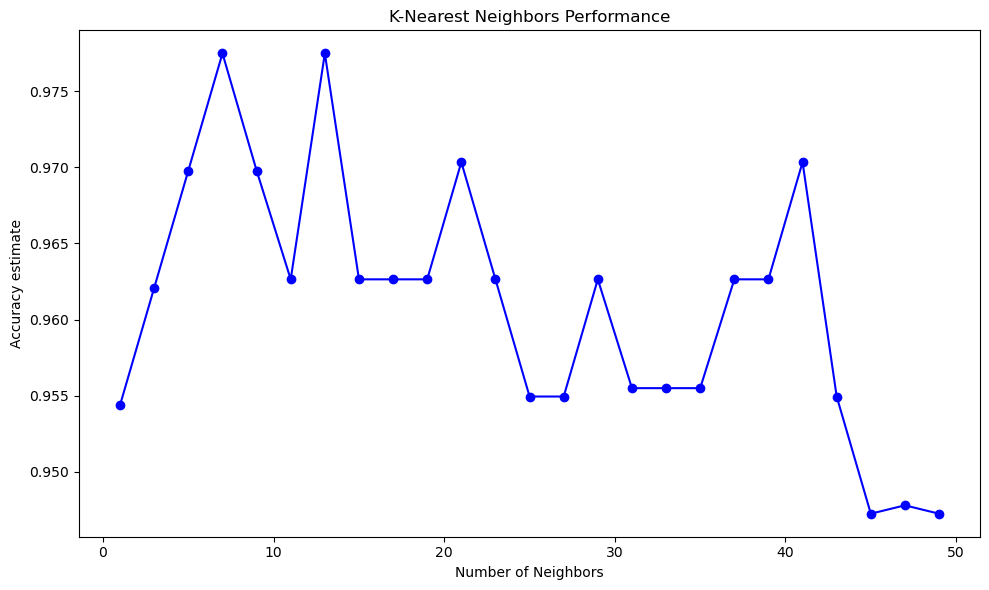

In [55]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(accuracy_grid['param_n_neighbors'], accuracy_grid['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy estimate')
plt.title('K-Nearest Neighbors Performance')
plt.tight_layout()
plt.show()

#### **Question 4:**
#### Model evaluation

Using the best value for `n_neighbors`, fit a KNN model on the training data and evaluate its performance on the test set using `accuracy_score`.

In [59]:
# initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=13)
# Fit the model
knn.fit(
    X=wine_train[feature_columns_list],
    y=wine_train['class']
)
# Predict on the test set
y_pred = knn.predict(wine_test[feature_columns_list])
# Calculate accuracy
accuracy = accuracy_score(wine_test['class'], y_pred)
print(f"Accuracy Score: {accuracy}")


Accuracy Score: 0.9333333333333333


# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is inspected for number of variables, observations and data types. | Data inspection is missing or incomplete.         |
| **Data Scaling**                                       | Data scaling or normalization is applied where necessary (e.g., using `StandardScaler`). | Data scaling or normalization is missing or incorrectly applied. |
| **Model Initialization**                               | The KNN model is correctly initialized and a random seed is set for reproducibility.            | The KNN model is not initialized, is incorrect, or lacks a random seed for reproducibility. |
| **Parameter Grid for `n_neighbors`**                   | The parameter grid for `n_neighbors` is correctly defined. | The parameter grid is missing or incorrectly defined. |
| **Cross-Validation Setup**                             | Cross-validation is set up correctly with 10 folds. | Cross-validation is missing or incorrectly set up. |
| **Best Hyperparameter (`n_neighbors`) Selection**       | The best value for `n_neighbors` is identified using the grid search results. | The best `n_neighbors` is not selected or incorrect. |
| **Model Evaluation on Test Data**                      | The model is evaluated on the test data using accuracy. | The model evaluation is missing or uses the wrong metric. |


## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `11:59 PM - 05/18/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/LCR/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
